<a href="https://colab.research.google.com/github/Mohanee28/06July2024/blob/main/Hr%20Analytics%20-%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Case Study / Hr Analytics

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
pip install names

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803681 sha256=9ba89fec15f44a4561c90de6c2b4112ff2b2e13aaab0fb8ed9ed4b4e0acdafae
  Stored in directory: /root/.cache/pip/wheels/c7/f0/8f/de9f15941cd988c39b82703fa04cb2d550ba5867f13c6da052
Successfully built names


In [4]:
import pandas as pd
import names
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("people.csv")

In [6]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


##Problem statement

Create an HR analytics to analyze and identify the company's employees
attrition-causing aspects. The solution must provide insight into the basic causes
of employee attrition, such as to observe possible trends, patterns, or certain
factors impacting attrition. Provide practical suggestions and approaches for
reducing attrition rates and enhance retention of staff in considering the results
obtained.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.tail(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
14989,0.69,0.70,3,212,2,0,0,0,product_mng,medium
14990,0.73,0.52,3,274,2,0,0,0,technical,high
14991,0.85,0.53,3,250,3,0,0,0,IT,medium
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low
14998,0.77,0.83,6,271,3,0,0,0,support,low


In [9]:
df.shape

(14999, 10)

In [10]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [13]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [14]:
df.keys()

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

Features
1.  satisfactoryLevel - Biased because rating is differ based on employee view
2. lastEvaluation - biased
3. numberOfProjects - Important
4. avgMonthlyHours - biased
5. timeSpent.company - Important
6. workAccident - Importent
7. left - [0, 1] 0 the person within the organisation 1 left
8. promotionInLast5years - very Important
9. dept - Important
10. salary - very important

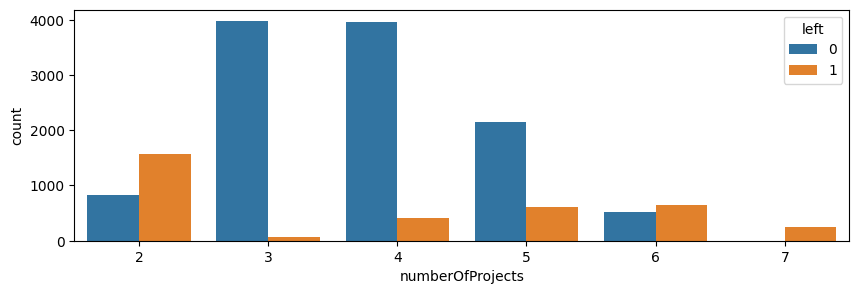

In [15]:
fig = plt.figure(figsize=(10,3))
fig = sns.countplot(x='numberOfProjects', data=df, hue = "left")

*   7 max number of projects
*   2 min number of projects

Conclution

*   2 are leaving less projects
*   7 are leaving hight work load

Resolution
*   3-4 are fair distribution of projects

##Time spend in company

<Axes: xlabel='timeSpent.company', ylabel='count'>

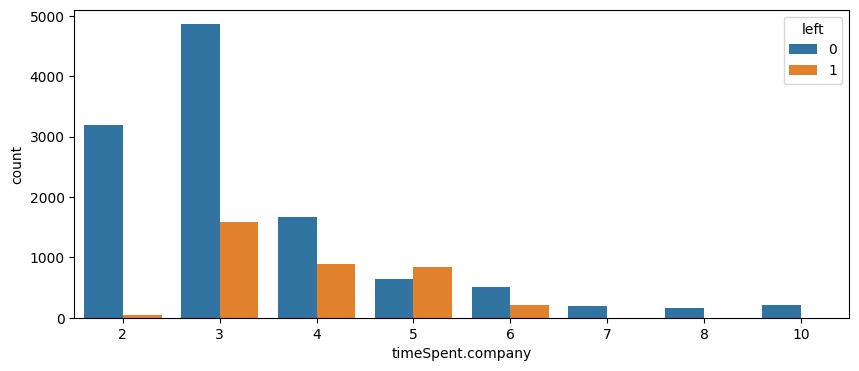

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(x = "timeSpent.company", data = df, hue = "left")

#Insights
1. form year 3 to 5 people are leaving
2. 5 is cruisial year for the company
3. after 6 year peoples are staying company

##Worrkaccident

<Axes: xlabel='workAccident', ylabel='count'>

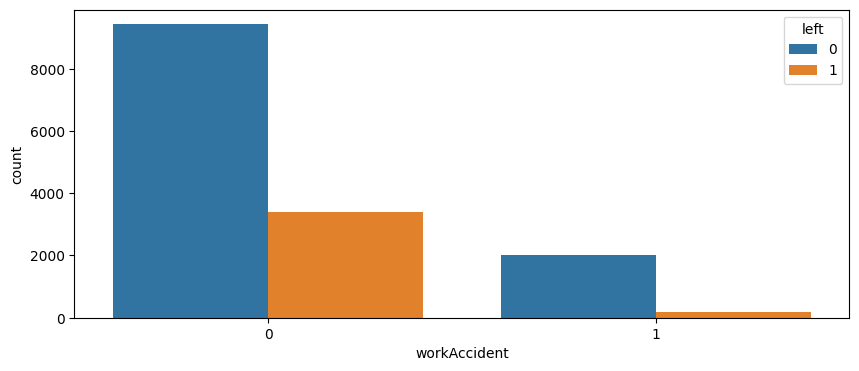

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(x = "workAccident", data = df, hue = "left")

*   0 - Zero accident
*   1 - Accident

Conclution
* That this workaccident column is not effecting the employee to leave the company

##Promotion In Last 5years

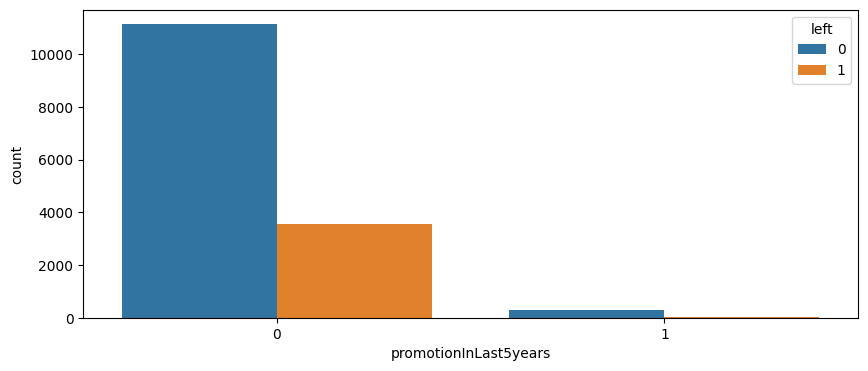

In [20]:
 plt.figure(figsize=(10,4))
 sns.countplot(x = "promotionInLast5years", data = df, hue = "left");

*   0 - Zero promotion
*   1 - having promotion

conclution
* The promotion in 5 years is a keyfactor for a person to leave a company

resolution
Accourding to the performance or technology and the work, there should be a fair promotion.


## Dept.

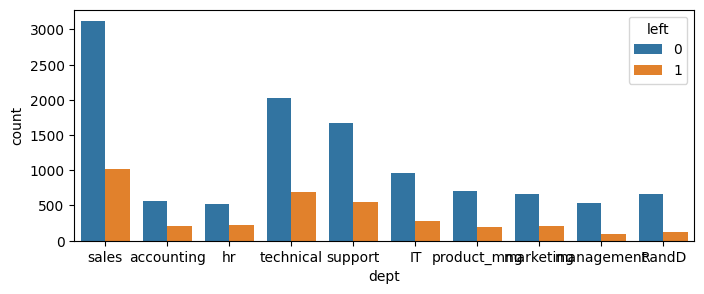

In [25]:
plt.figure(figsize=(8,3))
sns.countplot(x = "dept", data = df, hue = "left");

Top dept. of people leaving
*   Technical
*   Sales
*   Support

Recomentation
The company should more focused on these 3 dept. ther should councelling, meeting, debates to incresing the employees interest.



##Salary

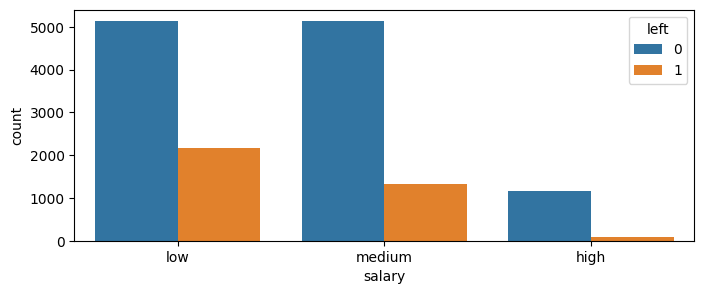

In [26]:
plt.figure(figsize=(8,3))
sns.countplot(x = "salary", data = df, hue = "left");

Concluetion  - Salary is a key factor
recomentation - Fair amount of salary distribution should

##Top 3 key factors
* Number of projects
* Salary
* Time spend in company